In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
df_results = pd.read_csv("./processed_csvs/classification.csv")


def convert_to_float_list(string_list):
    return [float(x) for x in string_list.strip("[]").split(", ")]


# Apply the function to the 'probabilities' column
df_results["probabilities"] = df_results["probabilities"].apply(convert_to_float_list)
df_results["positive_probabilities"] = [p[1] for p in df_results["probabilities"]]
all_datasets = df_results["dataset"].unique()
all_models = df_results["model"].unique()
all_annotators = df_results["annotator"].unique()
df_results = df_results.sort_values(by=["dataset", "model", "annotator"])
all_auroc = []

df_list = []

for dataset in all_datasets:
    for model in all_models:
        for annotator in all_annotators:
            df = df_results[
                (df_results["dataset"] == dataset)
                & (df_results["model"] == model)
                & (df_results["annotator"] == annotator)
            ].copy()
            labels = df["gold_class"].unique()
            auroc = roc_auc_score(df["gold_class"], df["positive_probabilities"])
            df["auroc"] = auroc
            df_list.append(df)

df_results = pd.concat(df_list)
df_results = df_results.drop(["instance", "probabilities"], axis=1)

df_results_grouped = (
    df_results.groupby(["task_type", "dataset", "model", "annotator"])
    .mean()
    .reset_index()
)

In [3]:
df_results_grouped

,task_type,dataset,model,annotator,id,gold_class,positive_probabilities,auroc
0,classification,asthma_classification,Llama-2-13b-chat,Annotator_1,235.0,0.144374,0.292143,0.933878
1,classification,asthma_classification,Llama-2-13b-chat,Annotator_10,235.0,0.144374,0.260607,0.875639
2,classification,asthma_classification,Llama-2-13b-chat,Annotator_11,235.0,0.144374,0.246471,0.926544
3,classification,asthma_classification,Llama-2-13b-chat,Annotator_12,235.0,0.144374,0.255733,0.986608
4,classification,asthma_classification,Llama-2-13b-chat,Annotator_2,235.0,0.144374,0.858525,0.917457
...,...,...,...,...,...,...,...,...
835,classification,obesity_classification,mistral-7b,Annotator_5,223.0,0.429530,0.317079,0.962296
836,classification,obesity_classification,mistral-7b,Annotator_6,223.0,0.429530,0.346190,0.978758
837,classification,obesity_classification,mistral-7b,Annotator_7,223.0,0.429530,0.399105,0.960437
838,classification,obesity_classification,mistral-7b,Annotator_8,223.0,0.429530,0.252688,0.954677


## get delta for Fig 1

In [4]:
dataset_figure = "cohort_alcohol_abuse_classification"
model_figure = "clinical-camel-7b"
df_fig = df_results_grouped[
    (df_results_grouped["dataset"] == dataset_figure)
    & (df_results_grouped["model"] == model_figure)
]

In [ ]:
df_instructions = pd.read_csv(
    "/home/ceballosarroyo.a/workspace/robust/ClinicalRobustness/instructions/instructions_from_experts.csv"
)
df_instructions.iloc[10:, :3].values

Text(0, 0.5, 'AUROC')

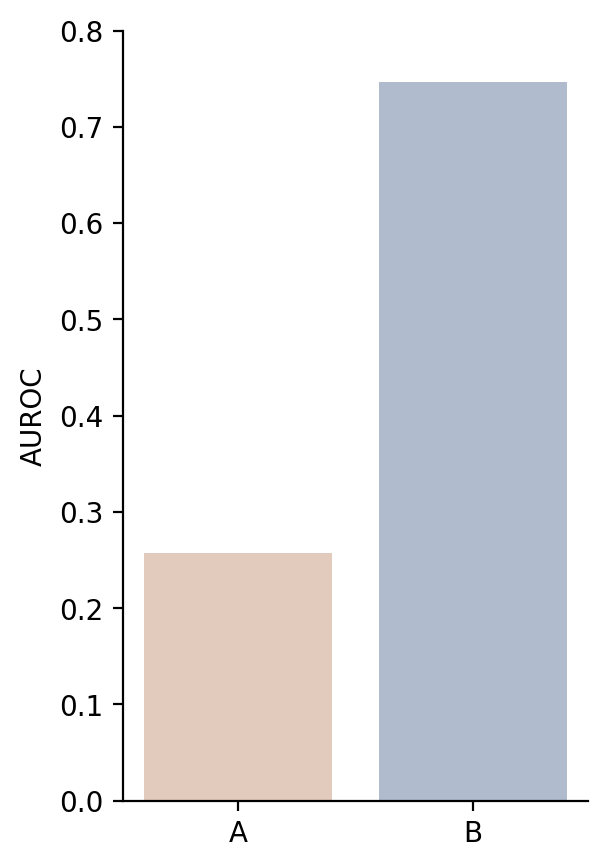

In [7]:
vals_y = [0.257028, 0.746988]
# plot bars
colors = ["green", "blue"]
# set palette as pastel
fig = plt.figure(figsize=(3, 5), dpi=200)
sns.set_palette("pastel")
# get green and blue from palette
colors = sns.color_palette("pastel", 3)
new_green = (colors[2][0] * 0.99, colors[2][1] * 0.9, colors[2][2] * 0.95)
colors = ["#c18c6f74", "#61779c7f"]


plt.bar(["A", "B"], vals_y, color=colors)
# despine
sns.despine()
plt.ylim(0, 0.8)
plt.ylabel("AUROC")

In [34]:
df_fig.sort_values(by="auroc")

,task_type,dataset,model,annotator,id,gold_class,positive_probabilities,auroc
302,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_11,42.5,0.034884,0.971638,0.257028
306,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_4,42.5,0.034884,0.995997,0.333333
305,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_3,42.5,0.034884,0.983400,0.353414
308,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_6,42.5,0.034884,0.979041,0.377510
311,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_9,42.5,0.034884,0.330387,0.409639
304,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_2,42.5,0.034884,0.970733,0.429719
309,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_7,42.5,0.034884,0.926396,0.542169
307,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_5,42.5,0.034884,0.972232,0.610442
301,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_10,42.5,0.034884,0.969001,0.690763
310,classification,cohort_alcohol_abuse_classification,clinical-camel-7b,Annotator_8,42.5,0.034884,0.952393,0.706827


In [6]:
ORDER_MAP = {
    "Llama-2-7b-chat-hf": 1,
    "asclepius": 2,
    "Llama-2-13b-chat": 3,
    "clinical-camel-7b": 4,
    "alpaca-7b": 5,
    "medalpaca-7b": 6,
    "mistral-7b": 0,
}

colors = sns.color_palette("deep", 10, desat=0.8)
COLOR_MAP = {
    "Mistral (7b)": colors[-2],
    "Llama-2 (7b)": colors[0],
    "Llama-2 (13b)": colors[2],
    "Alpaca (7b)": colors[8],
    "Asclepius (7b)": colors[1],
    "Clin-Camel (13b)": colors[3],
    "MedAlpaca (7b)": colors[9],
}

COLOR_MAP_LOWER = {
    "mistral-7b": colors[7],
    "Llama-2-7b-chat-hf": colors[1],
    "Llama-2-13b-chat": colors[0],
    "alpaca-7b": colors[3],
    "asclepius": colors[1],
    "clinical-camel-7b": colors[0],
    "medalpaca-7b": colors[3],
}

df_results_grouped["order"] = df_results_grouped["model"].apply(lambda x: ORDER_MAP[x])
df_results_grouped = df_results_grouped.sort_values(by=["order"])

In [7]:
MODEL_MAP = {
    "Llama-2-7b-chat-hf": "Llama-2 (7b)",
    "alpaca-7b": "Alpaca (7b)",
    "asclepius": "Asclepius (7b)",
    "clinical-camel-7b": "Clin-Camel (13b)",
    "medalpaca-7b": "MedAlpaca (7b)",
    "mistral-7b": "Mistral (7b)",
    "Llama-2-13b-chat": "Llama-2 (13b)",
}

In [8]:
df_results_grouped = df_results_grouped[["dataset", "model", "annotator", "auroc"]]

In [9]:
# get maximum and minimum for F1
df_results_grouped_min_max = (
    df_results_grouped.groupby(["dataset", "model"])
    .agg({"auroc": ["min", "max"]}, as_index=False)
    .reset_index()
)

In [10]:
df_results_grouped_min_max["y_labels"] = df_results_grouped_min_max["model"].apply(
    lambda x: MODEL_MAP[x]
)

In [11]:
df_results_grouped_min_max["delta"] = (
    df_results_grouped_min_max["auroc"]["max"]
    - df_results_grouped_min_max["auroc"]["min"]
)
df_results_grouped_delta = df_results_grouped_min_max[["dataset", "y_labels", "delta"]]

ORDER_MAP = {
    "Llama-2 (7b)": 2,
    "Llama-2 (13b)": 1,
    "Alpaca (7b)": 3,
    "Mistral (7b)": 0,
    "Asclepius (7b)": 6,
    "Clin-Camel (13b)": 5,
    "MedAlpaca (7b)": 7,
}

df_results_grouped_delta["order"] = df_results_grouped_delta["y_labels"].apply(
    lambda x: ORDER_MAP[x]
)
df_results_grouped_delta = df_results_grouped_delta.sort_values(by="order")

/tmp/ipykernel_64427/1872654230.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_grouped_delta["order"] = df_results_grouped_delta["y_labels"].apply(


In [12]:
df_results_grouped_delta.dataset.unique()

array(['cohort_drug_abuse_classification', 'mimic_mortality_prediction',
       'diabetes_mellitus_classification',
       'cohort_make_decisions_classification',
       'cohort_english_classification',
       'cohort_alcohol_abuse_classification',
       'cohort_abdominal_classification', 'cad_classification',
       'obesity_classification', 'asthma_classification'], dtype=object)

In [13]:
df_results_grouped_delta[
    df_results_grouped_delta["dataset"] == "cohort_alcohol_abuse_classification"
]

,dataset,y_labels,delta,order
,,,,
27,cohort_alcohol_abuse_classification,Mistral (7b),0.104418,0
21,cohort_alcohol_abuse_classification,Llama-2 (13b),0.534137,1
22,cohort_alcohol_abuse_classification,Llama-2 (7b),0.485944,2
23,cohort_alcohol_abuse_classification,Alpaca (7b),0.421687,3
25,cohort_alcohol_abuse_classification,Clin-Camel (13b),0.489960,5
24,cohort_alcohol_abuse_classification,Asclepius (7b),0.265060,6
26,cohort_alcohol_abuse_classification,MedAlpaca (7b),0.465863,7


### extraction

In [18]:
df_results_grouped_extraction = pd.read_csv("./processed_csvs/extraction_grouped.csv")

In [19]:
df_results_grouped_extraction

,Unnamed: 0,dataset,model,annotator,precision,recall,f1_score,y_labels,order
0,251,concept_treatment_extraction,mistral-7b,Annotator_9,0.054365,0.534493,0.088848,Mistral (7b),0
1,164,concept_test_extraction,mistral-7b,Annotator_6,0.252016,0.325948,0.196810,Mistral (7b),0
2,165,concept_test_extraction,mistral-7b,Annotator_7,0.281534,0.306763,0.230234,Mistral (7b),0
3,166,concept_test_extraction,mistral-7b,Annotator_8,0.436548,0.332664,0.301261,Mistral (7b),0
4,167,concept_test_extraction,mistral-7b,Annotator_9,0.127491,0.388611,0.130714,Mistral (7b),0
...,...,...,...,...,...,...,...,...,...
415,155,concept_test_extraction,medalpaca-7b,Annotator_9,0.134487,0.218935,0.120260,MedAlpaca (7b),6
416,144,concept_test_extraction,medalpaca-7b,Annotator_1,0.055441,0.280326,0.056807,MedAlpaca (7b),6
417,145,concept_test_extraction,medalpaca-7b,Annotator_10,0.038251,0.276064,0.054811,MedAlpaca (7b),6
418,147,concept_test_extraction,medalpaca-7b,Annotator_12,0.176260,0.267380,0.141807,MedAlpaca (7b),6


In [20]:
df_results_grouped_extraction["y_labels"] = df_results_grouped_extraction[
    "model"
].apply(lambda x: MODEL_MAP[x])

In [21]:
ORDER_MAP = {
    "Llama-2-7b-chat-hf": 1,
    "asclepius": 2,
    "Llama-2-13b-chat": 3,
    "clinical-camel-7b": 4,
    "alpaca-7b": 5,
    "medalpaca-7b": 6,
    "mistral-7b": 0,
}
df_results_grouped_extraction["order"] = df_results_grouped_extraction["model"].apply(
    lambda x: ORDER_MAP[x]
)
df_results_grouped_extraction = df_results_grouped_extraction.sort_values(by="order")

df_results_grouped_extraction

,Unnamed: 0,dataset,model,annotator,precision,recall,f1_score,y_labels,order
0,251,concept_treatment_extraction,mistral-7b,Annotator_9,0.054365,0.534493,0.088848,Mistral (7b),0
32,159,concept_test_extraction,mistral-7b,Annotator_12,0.135879,0.383172,0.146445,Mistral (7b),0
33,81,concept_problem_extraction,mistral-7b,Annotator_7,0.339727,0.409635,0.332981,Mistral (7b),0
34,73,concept_problem_extraction,mistral-7b,Annotator_10,0.150188,0.471370,0.192874,Mistral (7b),0
35,502,risk_factor_cad_extraction,mistral-7b,Annotator_8,0.042997,0.916063,0.065208,Mistral (7b),0
...,...,...,...,...,...,...,...,...,...
384,60,concept_problem_extraction,medalpaca-7b,Annotator_1,0.255418,0.243384,0.202626,MedAlpaca (7b),6
385,61,concept_problem_extraction,medalpaca-7b,Annotator_10,0.268212,0.277825,0.214738,MedAlpaca (7b),6
386,62,concept_problem_extraction,medalpaca-7b,Annotator_11,0.383966,0.260432,0.268020,MedAlpaca (7b),6
388,65,concept_problem_extraction,medalpaca-7b,Annotator_3,0.285115,0.261237,0.217495,MedAlpaca (7b),6


In [22]:
columns = ["dataset", "y_labels", "annotator", "F1"]


df_results_grouped_extraction = df_results_grouped_extraction.rename(
    columns={"f1_score": "F1"}
)
# get maximum and minimum for F1
df_results_grouped_min_max_ext = (
    df_results_grouped_extraction.groupby(["dataset", "y_labels"])
    .agg({"F1": ["min", "max"]}, as_index=False)
    .reset_index()
)

In [23]:
df_results_grouped_min_max_ext["delta"] = (
    df_results_grouped_min_max_ext["F1"]["max"]
    - df_results_grouped_min_max_ext["F1"]["min"]
)
df_results_grouped_delta_ext = df_results_grouped_min_max_ext[
    ["dataset", "y_labels", "delta"]
]
df_results_grouped_delta_ext

,dataset,y_labels,delta
,,,
0,concept_problem_extraction,Alpaca (7b),0.092366
1,concept_problem_extraction,Asclepius (7b),0.066058
2,concept_problem_extraction,Clin-Camel (13b),0.108179
3,concept_problem_extraction,Llama-2 (13b),0.115637
4,concept_problem_extraction,Llama-2 (7b),0.084376
5,concept_problem_extraction,MedAlpaca (7b),0.066158
6,concept_problem_extraction,Mistral (7b),0.150375
7,concept_test_extraction,Alpaca (7b),0.080359
8,concept_test_extraction,Asclepius (7b),0.109095


In [24]:
ORDER_MAP = {
    "Llama-2 (7b)": 2,
    "Llama-2 (13b)": 1,
    "Alpaca (7b)": 3,
    "Mistral (7b)": 0,
    "Asclepius (7b)": 6,
    "Clin-Camel (13b)": 5,
    "MedAlpaca (7b)": 7,
}

df_results_grouped_delta_ext["order"] = df_results_grouped_delta_ext["y_labels"].apply(
    lambda x: ORDER_MAP[x]
)
df_results_grouped_delta_ext = df_results_grouped_delta_ext.sort_values(by="order")

/tmp/ipykernel_64427/2028900215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_grouped_delta_ext["order"] = df_results_grouped_delta_ext["y_labels"].apply(


/tmp/ipykernel_64427/1220764123.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  mon = sns.violinplot(
/tmp/ipykernel_64427/1220764123.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  mon = sns.violinplot(


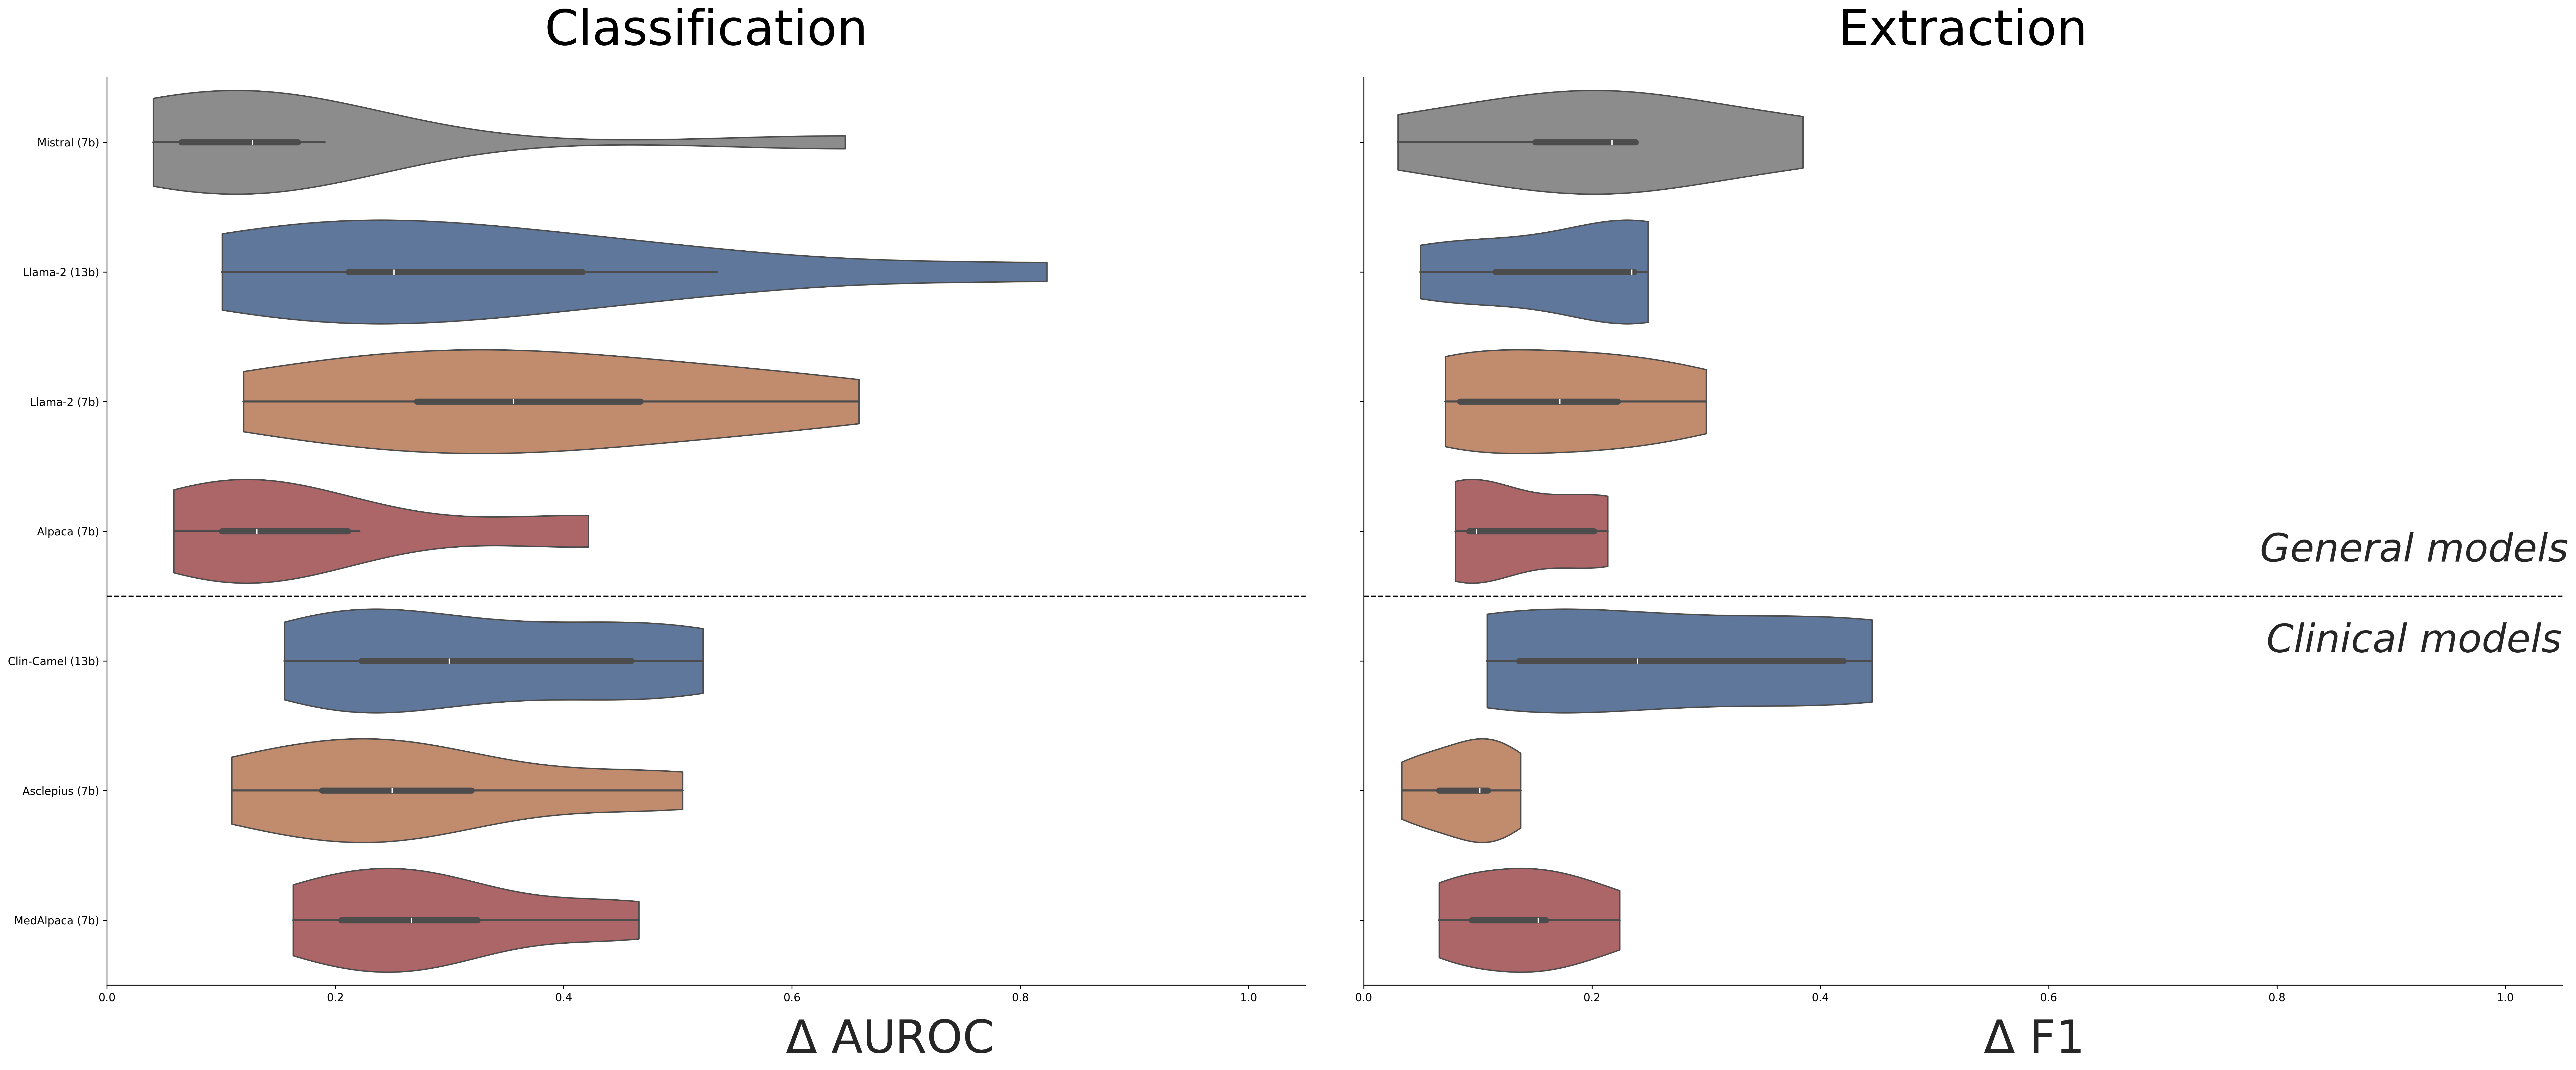

In [25]:
datasets = [
    df_results_grouped_delta,
    df_results_grouped_delta_ext,
]

fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(34, 14), dpi=300, sharex=True, sharey=True
)
sns.set_style("white")
sns.set_context("poster")
sns.set_palette("deep", n_colors=12)
sns.set_theme(style="white", font_scale=4)
# sns.set_theme(style='white', font_scale=2)
COLOR_MAP = {
    "Mistral (7b)": colors[7],
    "Llama-2 (7b)": colors[1],
    "Llama-2 (13b)": colors[0],
    "Alpaca (7b)": colors[3],
    "Asclepius (7b)": colors[1],
    "Clin-Camel (13b)": colors[0],
    "MedAlpaca (7b)": colors[3],
}


for idx, dataset in enumerate(datasets):
    # palette = sns.color_palette("blend:#7AB,#EDA")
    palette = sns.color_palette("crest")

    sns.set_theme(style="white", font_scale=3.5)
    mon = sns.violinplot(
        data=dataset, y="y_labels", x="delta", palette=COLOR_MAP, cut=0, ax=ax[idx]
    )
    if idx == 0:
        mon.set_title("Classification", fontsize=45, pad=30)
        # mon.set_xlabel("AUROC", pad=20)
    else:
        mon.set_title("Extraction", fontsize=45, pad=30)
    # mon.set_xlabel("F1 Score", pad=20)

    fig.text(0.35, 0, "$\Delta$ AUROC", ha="center")
    fig.text(0.78, 0, "$\Delta$ F1", ha="center")
    mon.axhline(3.5, color="black", linestyle="--", linewidth=1.25)
    if idx == 1:
        mon.text(
            0.92,
            3.85,
            "Clinical models",
            ha="center",
            va="center",
            style="italic",
            fontsize=36,
        )
        mon.text(
            0.92,
            3.15,
            "General models",
            ha="center",
            va="center",
            style="italic",
            fontsize=36,
        )
    mon.set(xlabel=None)
    mon.set(ylabel=None)
    plt.xlim(0, 1.05)
    plt.tight_layout()
    sns.despine(top=True, right=True, left=False, bottom=False)
    plt.savefig(f"deltas.pdf")